In [6]:
# make a prediction with a radius neighbors classifier model on the dataset
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import RadiusNeighborsClassifier


Predicted Class: 0


In [32]:
import pandas as pd
df = pd.read_pickle("./Episode_1.pkl")
print(df['Embedding'].size)


392


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
from sentence_transformers import SentenceTransformer, util

# Example sentences
sentences = df['Said']

# Vectorize sentences
vectorizer = TfidfVectorizer()
sentence_vectors = vectorizer.fit_transform(sentences)
sentence_vectors= np.stack(df['Embedding'])

# Perform clustering
num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(sentence_vectors)

# Find sentences near the average sentence in each cluster
for cluster_id in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == cluster_id)[0]
    cluster_sentences = [sentences[i] for i in cluster_indices]
    cluster_sentence_vectors = sentence_vectors[cluster_indices]
    average_vector = np.mean(cluster_sentence_vectors, axis=0)

    # Calculate distances to average vector
    distances = np.linalg.norm(cluster_sentence_vectors - average_vector, axis=1)
    nearest_sentence_index = np.argmin(distances)
    nearest_sentence = cluster_sentences[nearest_sentence_index]

    print(f"Cluster {cluster_id + 1}:")
    print(f"Average sentence: {vectorizer.inverse_transform(average_vector)}")
    print(f"Nearest sentence: {nearest_sentence}")
    print()


Cluster 1:
Average sentence: [array(['1250', '1450', '46', '48', '49', '50', 'able', 'about', 'admit',
       'adults', 'advice', 'again', 'against', 'ah', 'ahh', 'all',
       'allergic', 'alone', 'already', 'always', 'am', 'america',
       'amount', 'an', 'and', 'another', 'any', 'anymore', 'anyone',
       'anything', 'anywhere', 'apartment', 'appropriate', 'are', 'aren',
       'around', 'ask', 'assistant', 'at', 'ate', 'attacks', 'attracted',
       'away', 'back', 'bad', 'bag', 'barking', 'be', 'beauty', 'because',
       'bedroom', 'been', 'before', 'bet', 'between', 'big', 'bing',
       'bit', 'black', 'boss', 'break', 'breaks', 'bring', 'broke',
       'building', 'but', 'by', 'called', 'came', 'can', 'cannot', 'car',
       'cares', 'cases', 'cause', 'celery', 'champ', 'chance', 'chandler',
       'changed', 'chest', 'climbed', 'close', 'clunkers', 'cold',
       'college', 'colorful', 'come', 'coming', 'commercial',
       'constantly', 'couch', 'coughing', 'could', 'could

In [ ]:
from sentence_transformers import SentenceTransformer, util

def inverse_transform(sentences):
    model = SentenceTransformer('all-MiniLM-L6-v2')  

    # Generating predictions
    predictions = model.predict(input_sentences)

    # Using util.unmask to retrieve the original sentences
    reconstructed_sentences = [util.unmask(p, s + ' [MASK]') for p, s in zip(predictions, sentences)]

    return reconstructed_sentences


In [8]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

df = pd.read_pickle("./test1.pkl")


# Compute sentence embeddings
sentence_embeddings = np.stack(df['Embedding'])

# Cluster sentences
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(sentence_embeddings)

# Calculate average sentence embeddings for each cluster
cluster_centers = kmeans.cluster_centers_

# Find nearest sentences to the average embedding in each cluster
for i in range(num_clusters):
    cluster_sentences = np.array(sentences)[cluster_labels == i]
    cluster_sentence_embeddings = sentence_embeddings[cluster_labels == i]
    average_embedding = cluster_centers[i]

    # Compute cosine similarity
    similarity_scores = np.dot(cluster_sentence_embeddings, average_embedding) / (
            np.linalg.norm(cluster_sentence_embeddings, axis=1) * np.linalg.norm(average_embedding))

    # Sort sentences based on similarity
    sorted_indices = np.argsort(similarity_scores)[::-1]
    
    # Calculate distances to average vector
    distances = np.linalg.norm(cluster_sentence_vectors - average_vector, axis=1)
    nearest_sentence_index = np.argmin(distances)
    nearest_sentence = cluster_sentences[nearest_sentence_index]

    # Print sentences near the average embedding
    print(f"Cluster {i+1}:")
    print(f"Nearest sentence: {nearest_sentence}")
    for j in range(5):
        print(cluster_sentences[sorted_indices[j]])
    print('\n')
    
    
    



Cluster 1:
Nearest sentence: Everest!
Everest!
Everest!
We could get that Everest video though.
We're going to Everest!
Okay, it would be nice to leave an ass print on Everest!


Cluster 2:
Nearest sentence: Oh....
Oh my God.
Oh my God.
Oh my God.
Oh my God.
Oh my God.


Cluster 3:
Nearest sentence: Something huge!
No!
Noo!
Yes!
Oh!
No!!


Cluster 4:
Nearest sentence: Hey!
Hey!
Hey!
Hey!
Hey!
Hey!


Cluster 5:
Nearest sentence: It seems like all of the sudden; so much has happened.
Y'know?
Y'know?
Oh, y'know what?
I know.
I know.


Cluster 6:
Nearest sentence: Really?!
Yeah.
Yeah.
Yeah.
Yeah.
Yeah.


Cluster 7:
Nearest sentence: Phoebe is, making people.
Ross, hi, it's Rachel.
Rachel?
Ross, that girl just spent the entire evening talking to your friends, asking to hear stories about you, looking through Monica's photo albums, I mean you don't do that if you're just in it for two weeks.
Rachel!!!
Come on, Ross?


Cluster 8:
Nearest sentence: Look, we have to do something.
Ok, no, no, yo

C:\Users\amaca253\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\amaca253\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\amaca253\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\amaca253\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\amaca253\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\amaca253\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\ba

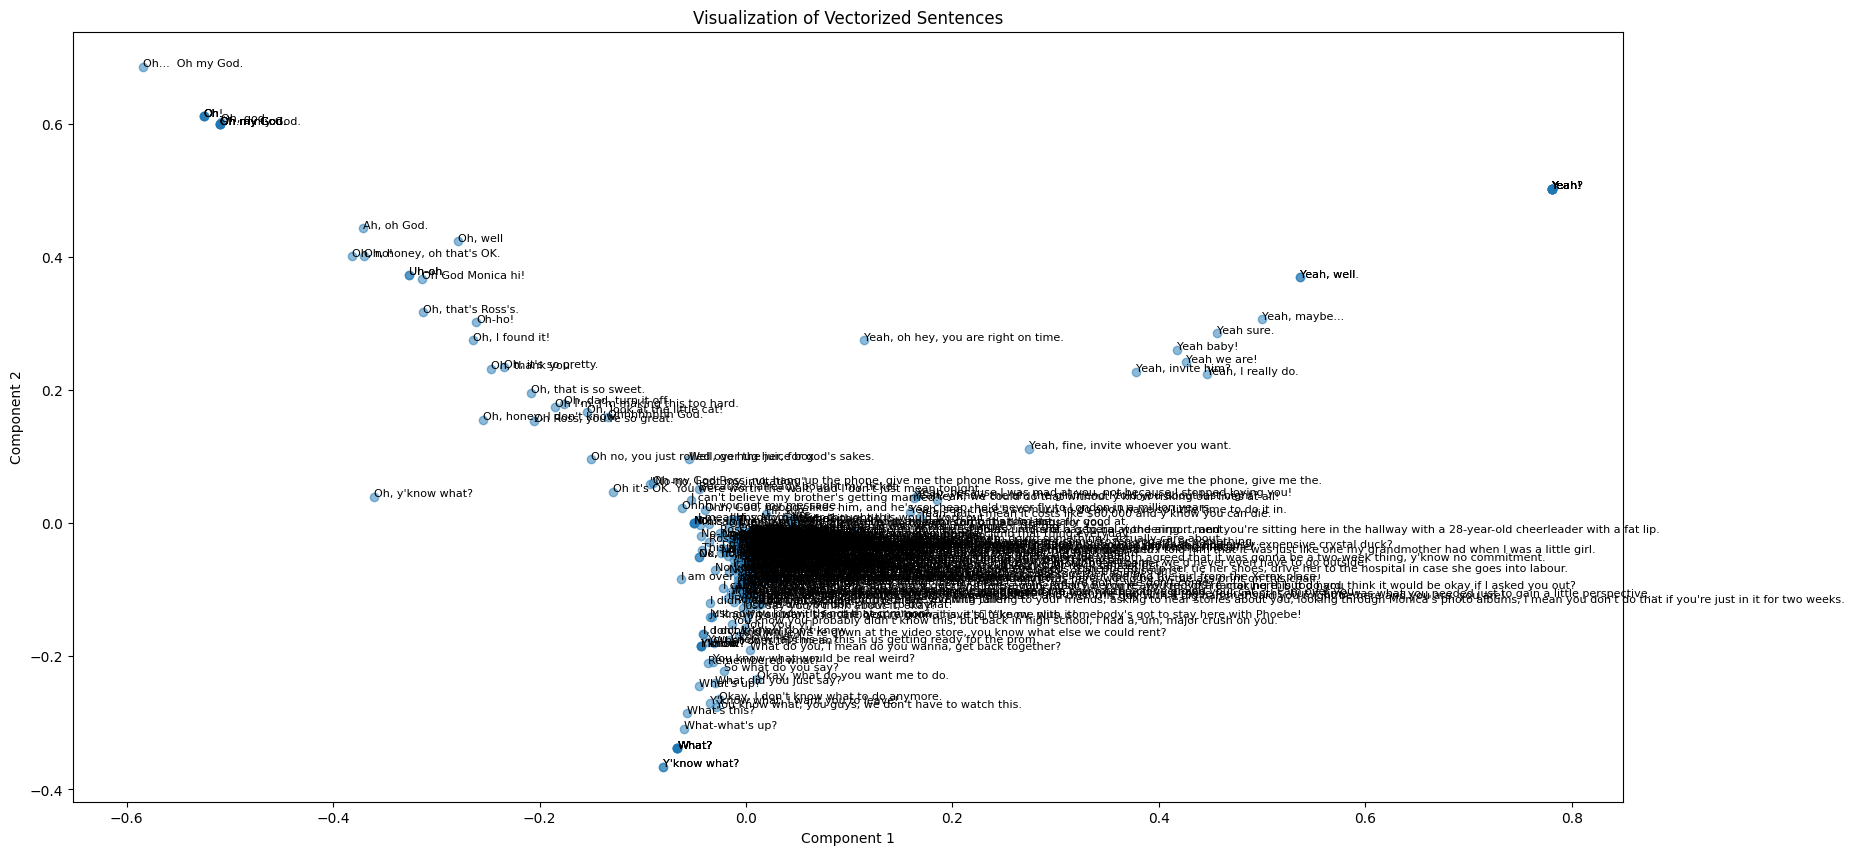

In [39]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Example sentences
sentences = df['Said']

# Vectorize sentences
vectorizer = TfidfVectorizer()
sentence_vectors = vectorizer.fit_transform(sentences)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(sentence_vectors.toarray())

# Visualize the reduced vectors
plt.figure(figsize=(20, 10))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.5)

# Add labels to the points
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=8)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Visualization of Vectorized Sentences")
plt.show()


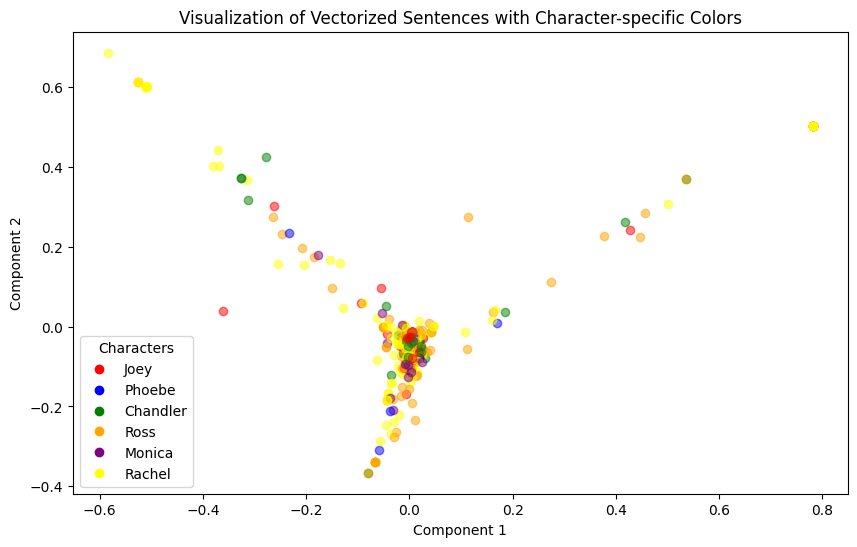

In [71]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Example sentences and corresponding characters
sentences = df['Said']

characters = df['Person']

# Assign colors to characters
unique_characters = list(set(characters))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow'][:len(unique_characters)]
character_color_map = dict(zip(unique_characters, colors))

# Vectorize sentences
vectorizer = TfidfVectorizer()
sentence_vectors = vectorizer.fit_transform(sentences)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(sentence_vectors.toarray())

# Visualize the reduced vectors with character-specific colors
plt.figure(figsize=(10, 6))

for i, (sentence, character) in enumerate(zip(sentences, characters)):
    color = character_color_map[character]
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], color=color, alpha=0.5)
    #plt.annotate(sentence, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=8)

# Create custom legend
handles = [plt.Line2D([], [], marker='o', color=color, linestyle='None') for color in colors]
plt.legend(handles, unique_characters, title="Characters")

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Visualization of Vectorized Sentences with Character-specific Colors")
plt.show()


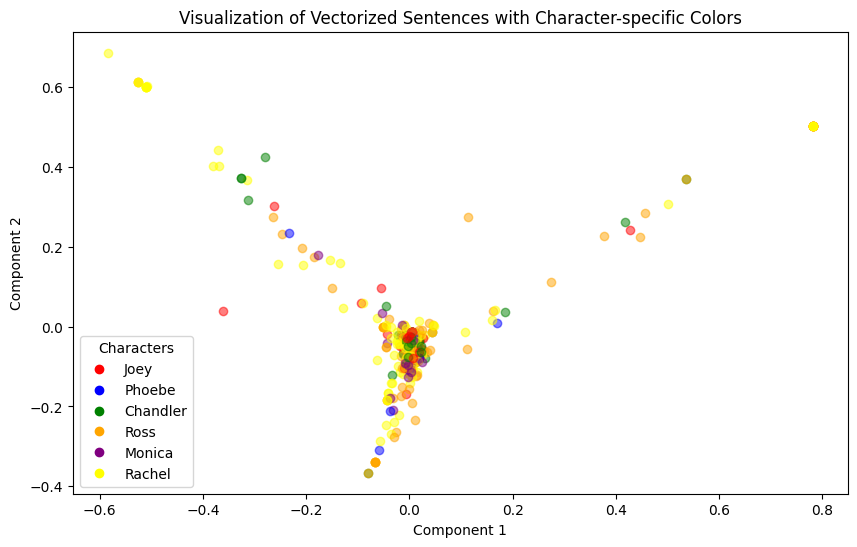

In [66]:
# Example sentences and corresponding characters
sentences = df['Said']
characters = df['Person']

# Assign colors to characters
unique_characters = list(set(characters))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow'][:len(unique_characters)]
character_color_map = dict(zip(unique_characters, colors))



# Vectorize sentences
vectorizer = TfidfVectorizer()
sentence_vectors = vectorizer.fit_transform(sentences)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(sentence_vectors.toarray())


# Visualize the reduced vectors with character-specific colors
plt.figure(figsize=(10, 6))

for i, (sentence, character) in enumerate(zip(sentences, characters)):
    color = character_color_map[character]
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], color=color, alpha=0.5)
    #plt.annotate(sentence, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=8)

# Create custom legend
handles = [plt.Line2D([], [], marker='o', color=color, linestyle='None') for color in colors]
plt.legend(handles, unique_characters, title="Characters")

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Visualization of Vectorized Sentences with Character-specific Colors")
plt.show()

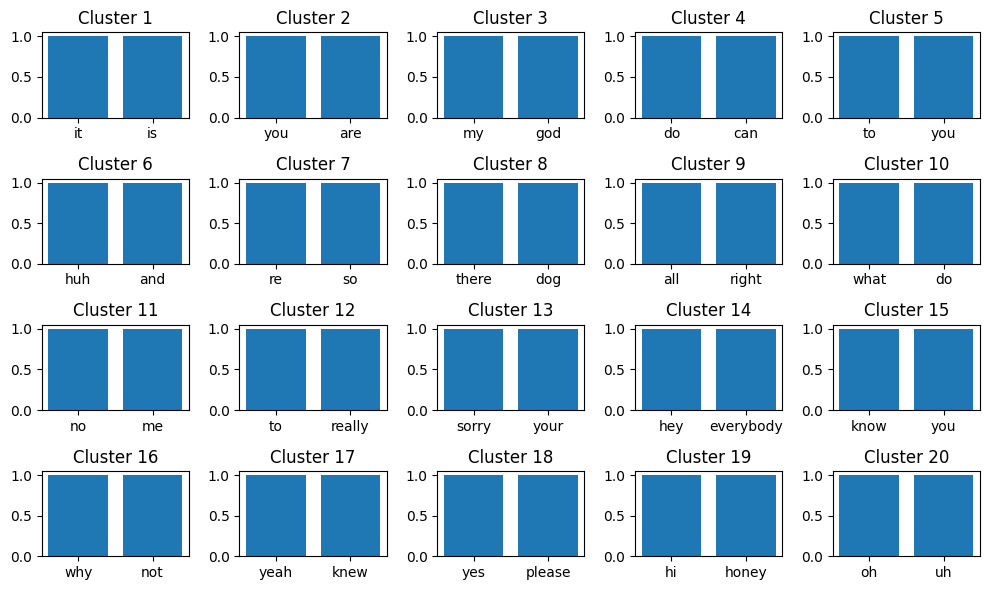

ValueError: invalid literal for int() with base 10: 'O'

In [16]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Step 1: Vectorize the documents
documents= df['Said']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

# Step 2: Perform clustering
num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Step 3: Get cluster assignments and centroids
cluster_assignments = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 4: Find the most distant words for each cluster
feature_names = vectorizer.get_feature_names()
most_distant_words = []
for cluster_idx in range(num_clusters):
    centroid = centroids[cluster_idx]
    max_indices = centroid.argsort()[-2:][::-1]  # Get indices of top 2 words
    words = [feature_names[idx] for idx in max_indices]
    most_distant_words.append(words)

# Step 5: Plot bar chart for most distant words in each cluster
plt.figure(figsize=(10, 6))
for cluster_idx in range(num_clusters):
    plt.subplot(4, 5, cluster_idx+1)
    plt.bar(range(2), [1, 1], tick_label=most_distant_words[cluster_idx])
    plt.title(f'Cluster {cluster_idx + 1}')

plt.tight_layout()
plt.show()

# Step 6: Calculate average position of characters in each cluster
characters = df['Person']
list_characters = list(set(characters))
character_positions = []  # Store average positions for each character
for cluster_idx in range(num_clusters):
    cluster_docs = np.where(cluster_assignments == cluster_idx)[0]  # Get indices of documents in the cluster
    #character_counts = np.zeros(len(documents[0]))  # Initialize character counts
    character_counts = np.zeros(len(characters))
    for doc_idx in cluster_docs:
        doc = documents[doc_idx]
        for char_idx, char in enumerate(doc):
            character_counts[char_idx] += int(char)  # Assuming characters are binary (1 or 0)
    character_avg = character_counts / len(cluster_docs)  # Calculate average character position
    character_positions.append(character_avg)

# Step 7: Plot average character positions in each cluster
plt.figure(figsize=(10, 6))
for cluster_idx in range(num_clusters):
    plt.subplot(4, 5, cluster_idx+1)
    plt.bar(range(len(character_positions[cluster_idx])), character_positions[cluster_idx])
    plt.title(f'Cluster {cluster_idx + 1}')

plt.tight_layout()
plt.show()


#TO DO: how much/average a character will say 
